# **CUSTOMER CHUN ANALYSIS**
<p>Here is a telecommunication company that includes customer information such as demographics, usage patterns churned or not churned.</p>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn

In [2]:
#Now, let's load our dataset and view the first 10 observations
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Let's determine the size of the dataset in the format (row, column)
telcom.shape

(7043, 21)

In [4]:
#It is observed that there are 7043 rows and 21 columns
#Let us view the properties of the dataset

telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Let us view the statistical summary of each numerical feature

telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Let's check for missing values within the dataset

telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## *OUTLIERS*
<p><h4>An important step in data cleaning and preprocessing is detecting and fixing outliers in a dataset, as that will negatively affect the statistical analysis and output a low accuracy of a model.
<br></br>
An Outlier is an observation that differs significantly, either an extremely high or low data pount relative to the nearest data point, that rests on the neighbouring existing values in a dataset.
</h4></p>


<p><i>It is observed that there are no missing values within the dataset. Hence, let us check for outliers using a box plot and check for duplicates.</i></p>

<Axes: >

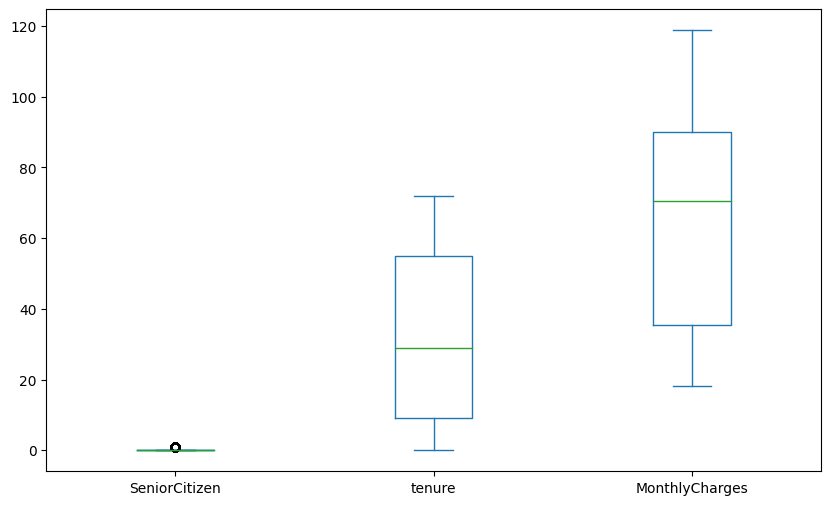

In [8]:
telcom.plot(kind = 'box', vert = True, figsize = (10, 6))

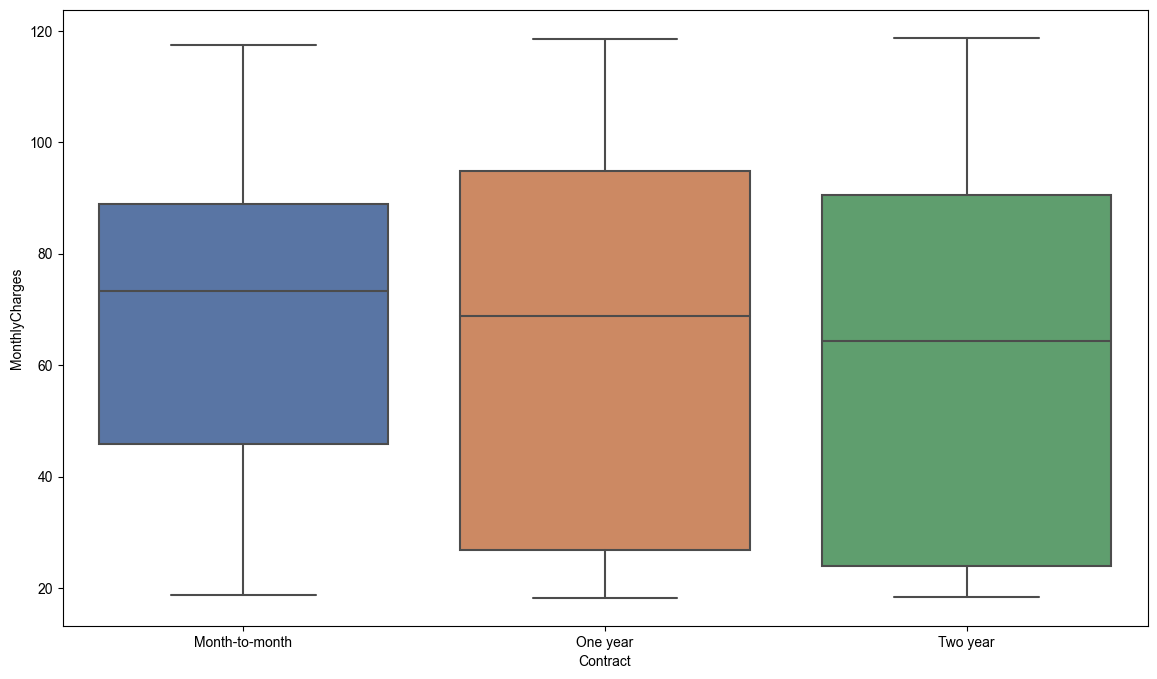

In [9]:
fig = plt.subplots(figsize = (14, 8))
sns.set(style = 'darkgrid')
ax = sns.boxplot(x = telcom['Contract'], y = telcom['MonthlyCharges'])

In [10]:
#Here is an interactive boxplot showing the contract by monthly charges
#It is observed that there are no outliers
fig = px.box(telcom, x='Contract', y='MonthlyCharges')
fig.show()

In [11]:
outlier_check = telcom[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
outlier_check.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [12]:
#First quartile 
Q1 = outlier_check.quantile(0.25)
#Second quartile
Q3 = outlier_check.quantile(0.75)
#Interquartile range
IQR = Q3 - Q1
print(IQR, Q3, Q1)

SeniorCitizen      0.00
tenure            46.00
MonthlyCharges    54.35
dtype: float64 SeniorCitizen      0.00
tenure            55.00
MonthlyCharges    89.85
Name: 0.75, dtype: float64 SeniorCitizen      0.0
tenure             9.0
MonthlyCharges    35.5
Name: 0.25, dtype: float64


In [13]:
#Upperbound of the quartile
print((Q3 + 1.5 * IQR))

SeniorCitizen       0.000
tenure            124.000
MonthlyCharges    171.375
dtype: float64


In [14]:
#Lowerbound of the quartile
print(Q1 - 1.5 * IQR)

SeniorCitizen      0.000
tenure           -60.000
MonthlyCharges   -46.025
dtype: float64


In [15]:
#Defining  function to determine the total outliers
def total_outliers(X, Y):
    c = 0
    for i in X:
        if i > Y:
            c +=1
    print(c)
    
    

In [16]:
total_outliers(outlier_check.tenure, 124)

0


In [17]:
total_outliers(outlier_check.MonthlyCharges, 171.375)

0


<p><i><h4>In summary, after reviewing our numerical values, it is observed that there are no outliers, therefore, the dataset is good enough to calculate the mean.</h4></i></p>

<Axes: ylabel='Density'>

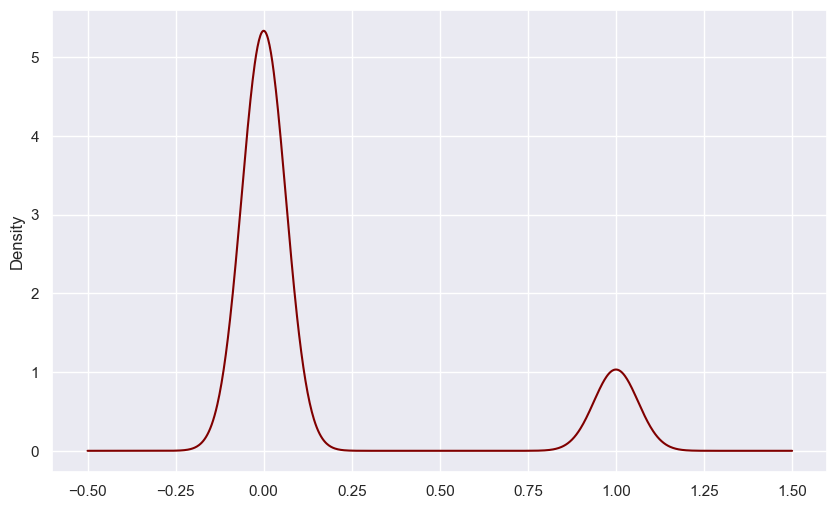

In [18]:
telcom['SeniorCitizen'].plot(kind = 'density', figsize = (10,6), color = 'maroon')

<Axes: ylabel='Density'>

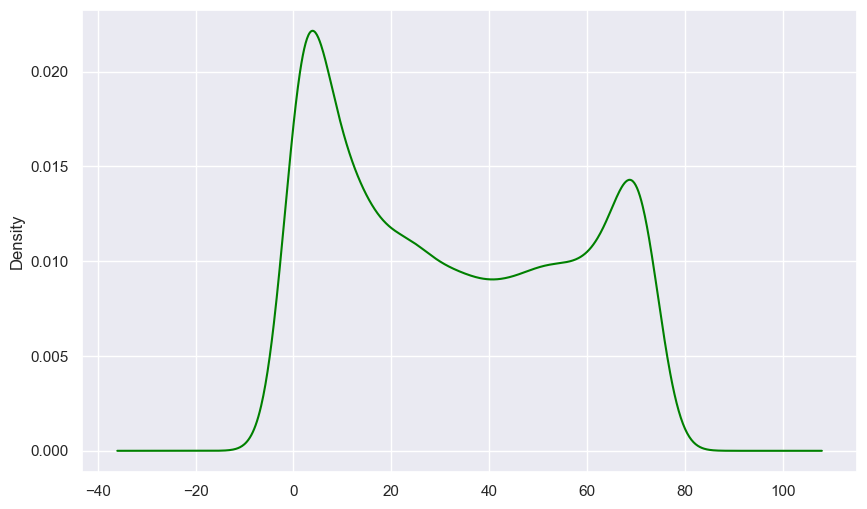

In [19]:
telcom['tenure'].plot(kind = 'density', figsize = (10,6), color = 'green')

<Axes: ylabel='Density'>

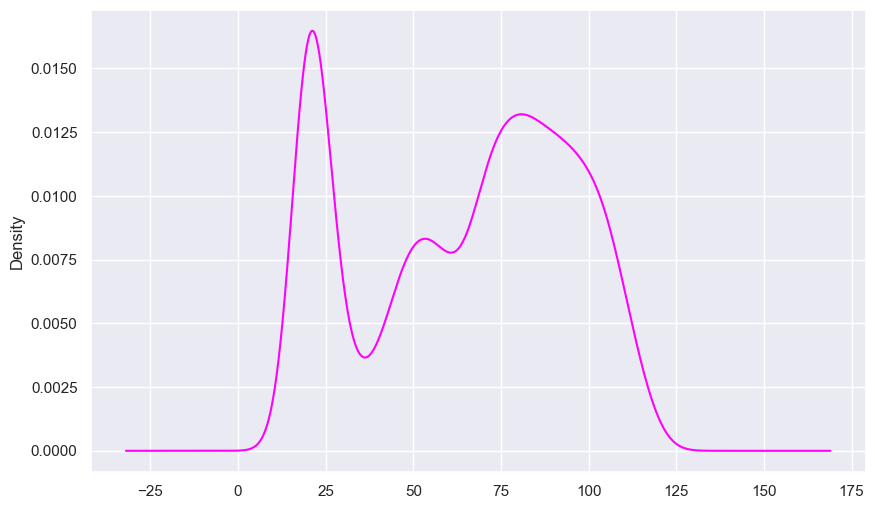

In [20]:
telcom['MonthlyCharges'].plot(kind = 'density', figsize = (10,6), color = 'magenta')

### *Duplicated Values*

In [21]:
#Now, let's check for duplicte values
telcom.duplicated().sum()

0

<p><i>To further the analysis, unnecessary columns will be dropped</i><p>

In [22]:
telcom.drop(columns = 'customerID', inplace = True)
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **One Hot Encoding**

<p><i>We shall model our dataset by creating dummy variables with a pipeline.

Now, let's get at it. 💪
</i></p>

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [24]:
#First, let's check for labels for each Categorical variables
for col in telcom.columns:
    print(col, ': ', len(telcom[col].unique()), 'labels')

gender :  2 labels
SeniorCitizen :  2 labels
Partner :  2 labels
Dependents :  2 labels
tenure :  73 labels
PhoneService :  2 labels
MultipleLines :  3 labels
InternetService :  3 labels
OnlineSecurity :  3 labels
OnlineBackup :  3 labels
DeviceProtection :  3 labels
TechSupport :  3 labels
StreamingTV :  3 labels
StreamingMovies :  3 labels
Contract :  3 labels
PaperlessBilling :  2 labels
PaymentMethod :  4 labels
MonthlyCharges :  1585 labels
TotalCharges :  6531 labels
Churn :  2 labels


In [25]:
telcom.shape

(7043, 20)

In [26]:
#Examine how many columns we will obtain after One Hot Encoding these variables
pd.get_dummies(telcom, drop_first=True).shape

(7043, 6560)

<p><i><h3><b>It is observed that 6540 columns will be added and that doesn't make our prediction great.
It is advisable not to perform One Hot Encoding on these dataset as it will be skewed.

As a Data Analyst/Scientist, fairness in analysis/modelling is of utmost importance.
</b></h3></i></p>

## **HYPOTHESIS TESTING**

<p><i><h4>Hypothesis testing is a statistical method used to make inferences about population parameters based on a sample of data.</h4></i></p>

<p><i><h5>We shall carry Hypotheis testing using T-test on the Churn feature to determine between churned and non-churned customers.</h5></i></p>

In [27]:
telcom['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64